# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [91]:
# Loading Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


# Reading files
product_salesdf = pd.read_csv('product_sales.csv')

# Data Information


![product_sales_data_info](product_sales_data_info.png)


# Data Cleaning and Validation

In [92]:
product_salesdf.head(20)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


## 'sales_method' 
"em + call" and "email" entries change to "Email + Call" and "Email" respectively

In [93]:
product_salesdf['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [94]:
product_salesdf['sales_method'] = product_salesdf['sales_method'].replace(['em + call'], 'Email + Call')
product_salesdf['sales_method'] = product_salesdf['sales_method'].replace(['email'], 'Email')
product_salesdf['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

## 'customer_id'

In [95]:
product_salesdf['customer_id'].count()

15000

## 'nb_sold'

In [96]:
product_salesdf['nb_sold'].describe()

count    15000.000000
mean        10.084667
std          1.812213
min          7.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         16.000000
Name: nb_sold, dtype: float64

## 'revenue'  
'revenue' column has null values, will adress it by imputing mean of each 'sales_method', by this we cannot greatly influence the mean of each category. also our analysis will focus on how each 'sales_method' affect the revenue.

In [97]:
print(product_salesdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


In [98]:
print(f"Overall mean ", product_salesdf['revenue'].mean())
print(f'mean by', product_salesdf.groupby('sales_method')['revenue'].mean())

Overall mean  93.93494255349705
mean by sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64


In [99]:

product_salesdf['revenue'] = product_salesdf['revenue'].fillna(product_salesdf.groupby('sales_method')['revenue'].transform('mean'))
product_salesdf['revenue'] = product_salesdf['revenue'].round(2)
product_salesdf.head(100)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.13,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.13,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
95,1,Email,172fcd47-62ac-4976-bac7-6934464a8c5c,8,81.98,0,23,Arizona
96,4,Call,750b0907-f87d-4c4e-95bf-de9952fb22c1,11,53.08,5,27,Kentucky
97,4,Call,8185cdfd-0b66-4ea3-aa77-c9e4d64f2b52,10,51.82,0,27,Ohio
98,5,Email + Call,b70489e0-d3d4-494d-b4c9-fa7f71ba4b21,12,185.65,1,27,Michigan


## 'years_as_customer' 

column exceed the time frame when the company is founded. re-adjusting the number of years being customer to start when the company is founded.

In [100]:
today = datetime.date.today()
diff_in_years = today.year - 1984
product_salesdf[product_salesdf['years_as_customer'] > diff_in_years]


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [101]:
product_salesdf.loc[product_salesdf['years_as_customer'] > diff_in_years, 'years_as_customer'] =  diff_in_years

## 'nb_site_visits'

In [102]:
product_salesdf['nb_sold'].describe()

count    15000.000000
mean        10.084667
std          1.812213
min          7.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         16.000000
Name: nb_sold, dtype: float64

## 'state'

In [103]:
product_salesdf['state'].nunique()

50

# Summary of Data Validation:
## Columns
**- week:** made up of 6 unique identifiers 1-6. matches the time frame since launched six weeks ago, no cleaning is needed.

**- sales_method:**  "em + call" and "email" entries change to  "Email + Call" and "Email" respectively, to match the given          description.

**- customer_id:** made up of 15000 unique identifiers, match the number of rows, no null values. no adjustment needed

**- nb_sold:** Numeric, number of new products sold. match the description. no adjustment made.

**- revenue:** 1074 null values or 7% of the dataset. impute with the mean of each 'sales_method' and rounded to 2 decimal places.

**- years_as_customer:** 2 rows exceed to the founding date of the company, adjust years as customer to when the company is founded, all customer inside the time period.

**- nb_site_visits:** Match the description. no adjusment made.

**- state:** 50 unique state, no adjustment made.


#  Exploratory Analysis

## - How many customers were there for each approach?

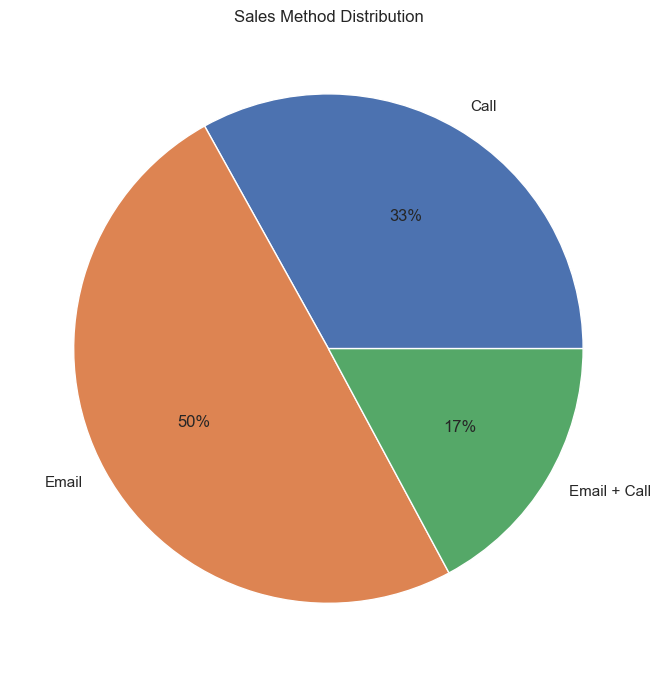

In [104]:
#Counting costumers
count_sales_method = product_salesdf.groupby('sales_method')['customer_id'].count().reset_index()

#Plotting pie chart
plt.pie(count_sales_method['customer_id'], 
        labels = count_sales_method['sales_method'],
        autopct='%.0f%%')
plt.title('Sales Method Distribution')
sns.set()

plt.show()



The pie chart illustrates the observation of sales methods for the given data. 'Email' constitutes approximately 50% of the total, followed by 'Call' at around 33%, and 'Email + Call' at approximately 17%. This distribution shows that 'Email' is the most frequently used sales method, followed by 'Call,' while the combined approach of 'Email + Call' is the least utilized.

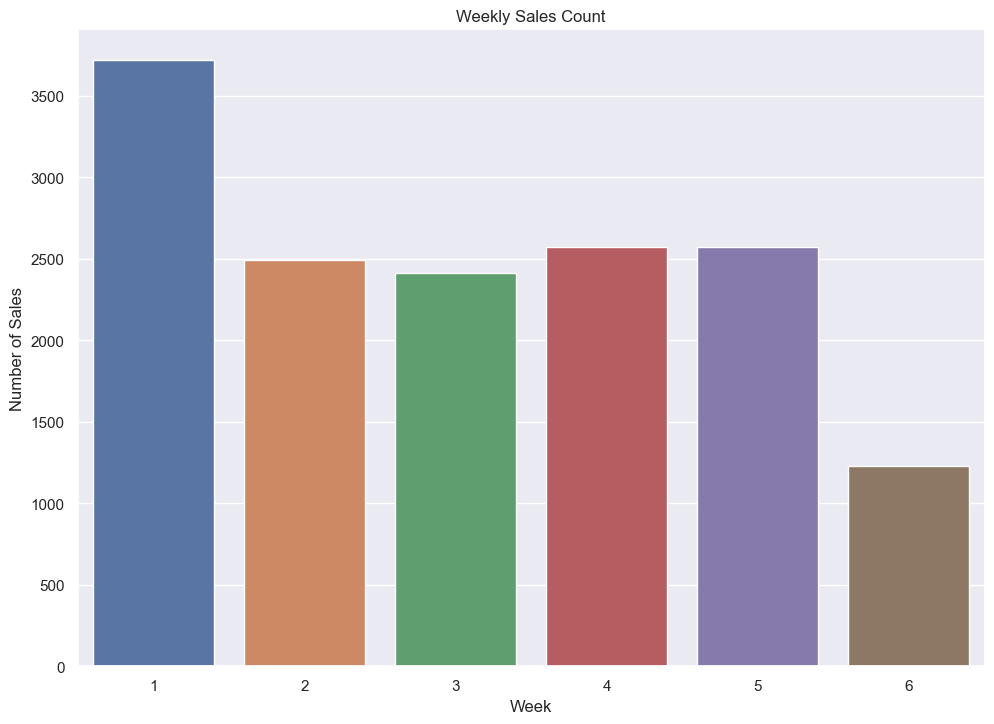

In [105]:
sns.countplot(data=product_salesdf, x= 'week')
plt.xlabel('Week')
plt.ylabel('Number of Sales')
plt.title('Weekly Sales Count')
plt.show()

Week 1 shows a higher sales count, with over 3500 observations. However, in the following week, the count decreases to 2500 observations. Week 6 represents the lowest point in sales observations.

## - What does the spread of the revenue look like overall? And for each method?

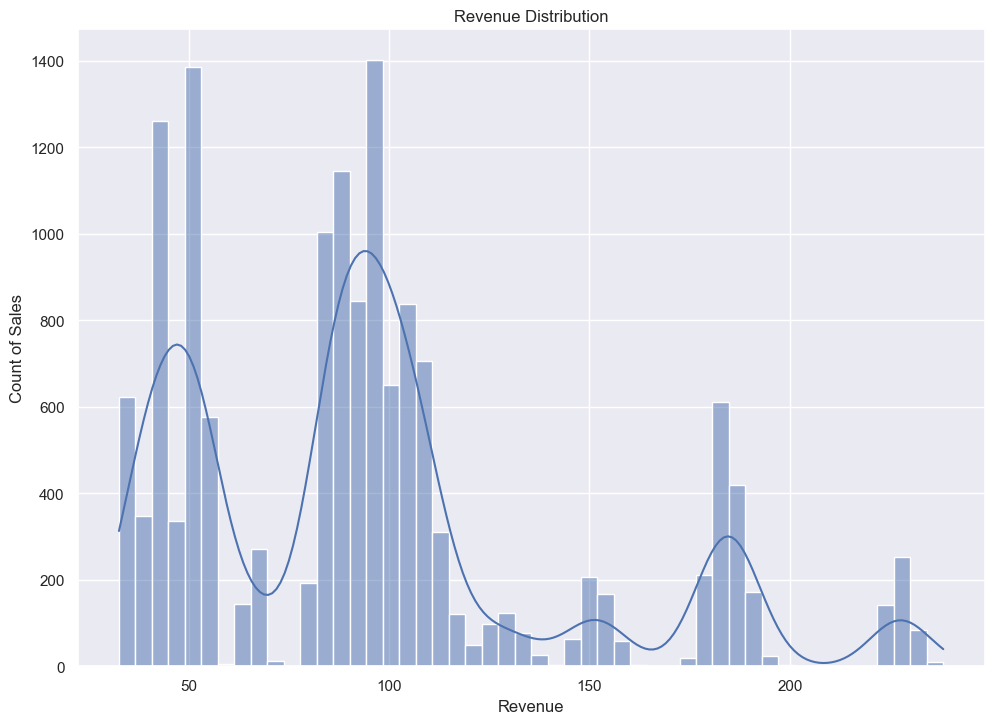

In [106]:
sns.histplot(data= product_salesdf, x= 'revenue', bins= 50, kde= True)
plt.xlabel('Revenue')
plt.ylabel('Count of Sales')
plt.title('Revenue Distribution')
sns.set()

plt.show()



Revenue exhibits a multimodal distribution increase around 50, but experiences a drop at 70 and peaks at around 95.

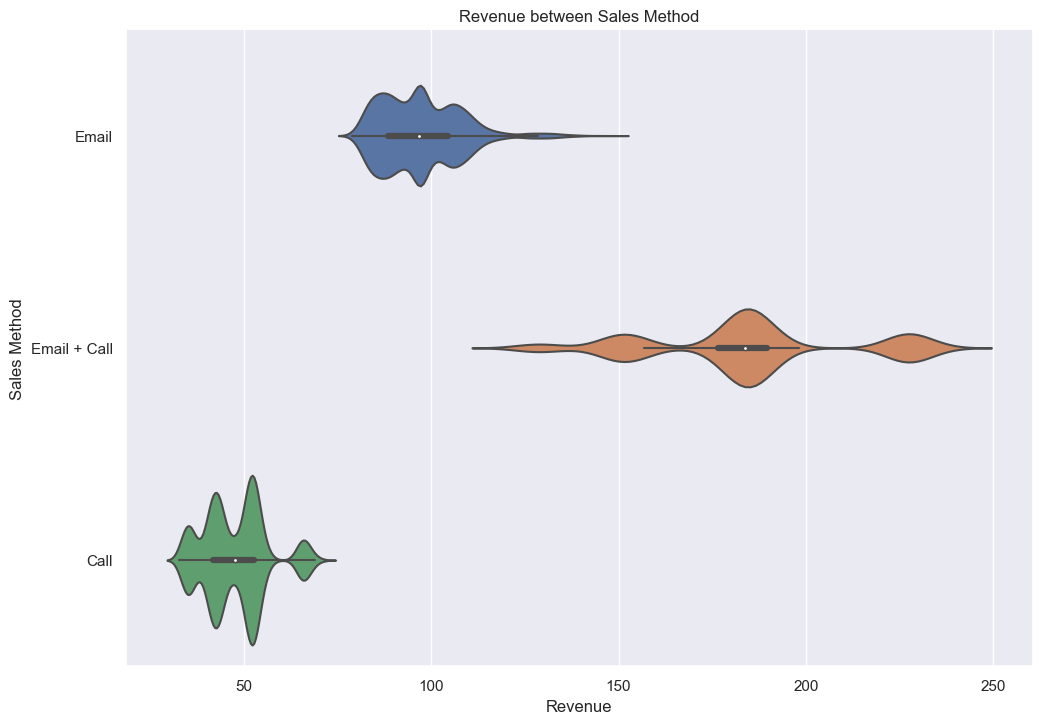

In [107]:
sns.violinplot(data=product_salesdf,x = 'revenue', y= 'sales_method')

plt.xlabel('Revenue')
plt.ylabel('Sales Method')
plt.title('Revenue between Sales Method')
sns.set()


plt.show()


Distinct revenue gaps exist between 3 'sales_methods'. 'Email' and 'Email + Call' method generate significantly higher revenue than using only calls. the highest revenue pool came from 'Email + Call' methods, but take note from the previous pie chart it is only 17% of the observation of sales which is the least utilized.

## - Was there any difference in revenue over time for each of the methods?

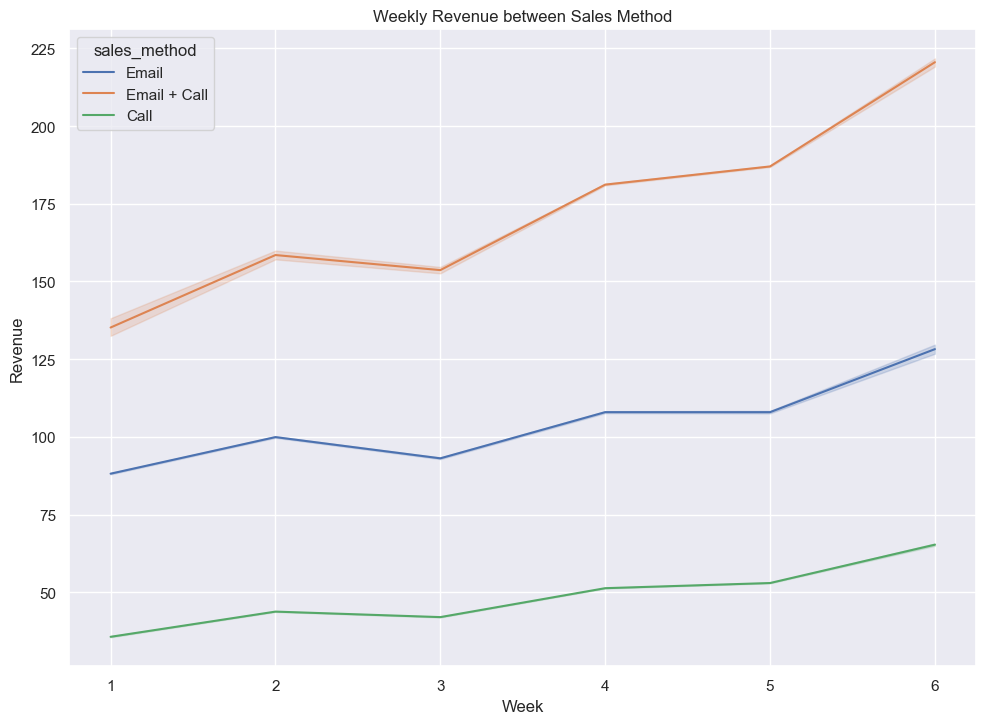

In [108]:
sns.lineplot(data=product_salesdf, x= 'week', y='revenue', hue='sales_method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Weekly Revenue between Sales Method')

plt.show()


'Email + Call' consistently achieves the highest week by week in revenue, while 'Call' consistently generates the lowest. This pattern persists over successive weeks, with all methods exhibiting upward revenue trends. The ranking remains consistent, with 'Email + Call' leading, followed by 'Email,' and then 'Call.'

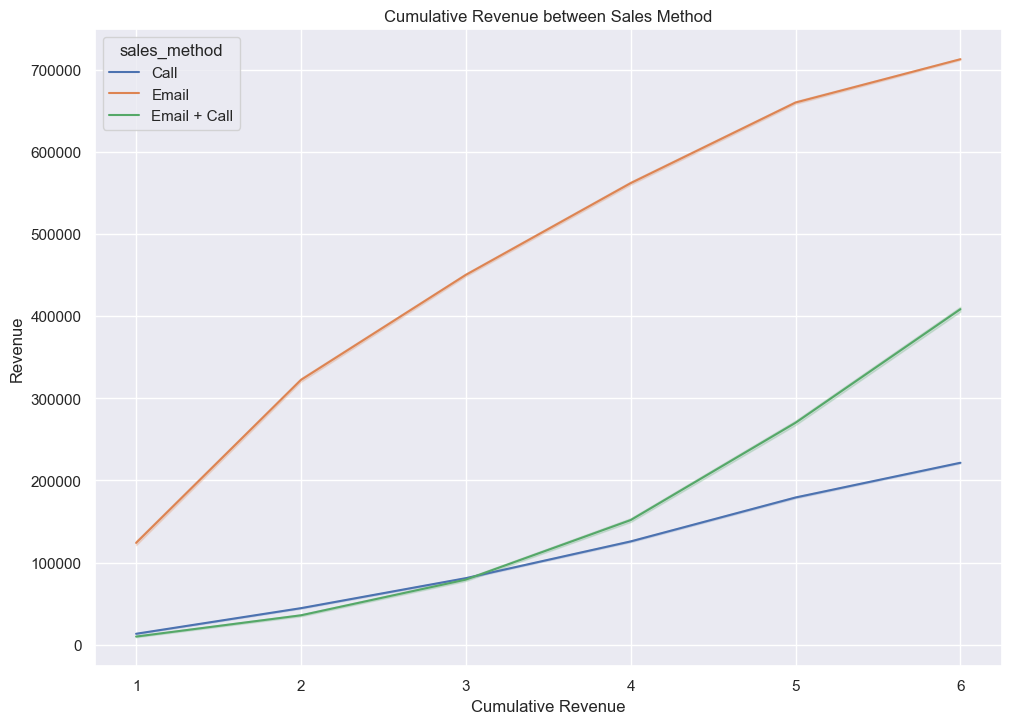

In [113]:
#Insert new Column for Cumulative Sum
product_salesdf.sort_values(['sales_method', 'week'], ascending=[True,True], inplace=True)
product_salesdf['revenue_cumsum'] = product_salesdf.groupby('sales_method')['revenue'].cumsum()

#PLotting
sns.lineplot(x='week', y='revenue_cumsum', hue='sales_method', data= product_salesdf)

plt.xlabel('Cumulative Revenue')
plt.ylabel('Revenue')
plt.title('Cumulative Revenue between Sales Method')


plt.show()


Cumulatative sums of 'sales_method', 'Email' is the highest revenue week by week. 'Email + Call' starts the lowest but starts increasing surpassing the 'Call' method by week 3 and 'Call' have the lowest revenue all 3 methods.

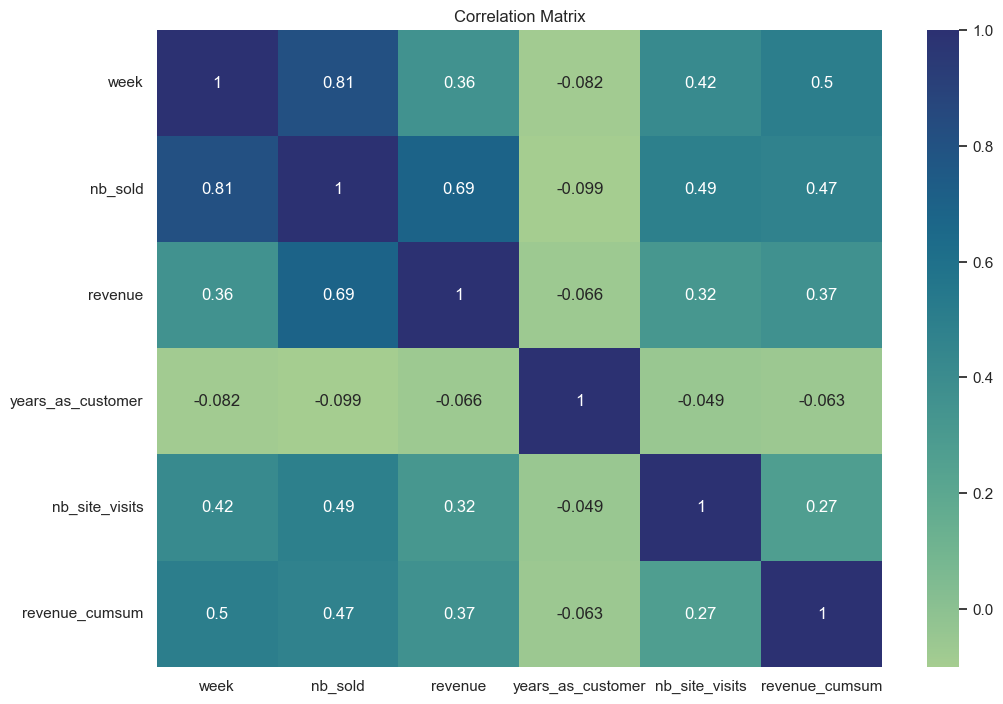

In [110]:
sns.heatmap(data = product_salesdf.corr(), cmap="crest", annot = True)
plt.title('Correlation Matrix')

plt.show()


 correlations between "numbers sold" and three variables: "week," "revenue," and "number of site visits." Notably, a strong positive correlation exists between "nb_sold" and "week," suggesting that as the weeks progress, the number of units sold tends to increase.

# Summary of Findings
**Sales Distribution:** The pie chart shows that 'Email + Call' is the least utilized method, representing only around 17% of observations. By focusing on this method, you have the potential to tap into an underutilized resource and maximize its revenue-generating capabilities.

**Revenue Performance:** 'Email + Call' consistently achieves the highest weekly revenue compared to 'Email' and 'Call' methods. This trend has been observed over successive weeks, indicating the method's consistent effectiveness in generating higher revenue.

**Cumulative Revenue:** Although 'Email' generated the highest revenue consistently throughout the weeks. On the other hand, 'Email + Call' started with the lowest revenue but demonstrated significant growth, surpassing the revenue generated by the 'Call' method by the end of week 3. 'Call' had the lowest revenue among all three methods. 

# Recommendation
Considering that the 'Call' method consumes a considerable amount of time, averaging 30 minutes per customer, and is the least effective in revenue generation, i would suggest to focus on the 'Email + Call' method.

'Email + Call' method offers the best combination of effectiveness, growth potential, and revenue generation. Additionally, it is an underutilized resource with the potential to generate higher revenue for the business.

'Email' is the top revenue generating method, Sales team can enhance email, by mean of personalization, adding tutorials, and other information that can help their business.

By prioritizing and investing in the 'Email + Call' approach, the business can capitalize on its revenue-generating capabilities and maximize results. Simultaneously, reducing reliance on the 'Call' method will free up valuable time for the sales team, leading to improved efficiency and productivity. 


# Business Metric

Based on the findings, I recommended business metric to monitor would be the "Percentage Increase in Revenue from 'sales_method'. This metric would calculate the percentage change in revenue generated from the sales method over a weekly time period. It reflects the effectiveness of conversion from 'Call' to 'Email + Call' and growth potential of this approach in generating higher revenue compared to other sales methods.

Monitoring the percentage increase in revenue from 'Email + Call' would allow the business to track the method's consistent performance over time, combined with identification of revenue peaks to gauge its overall effectiveness in contributing to the company's growth and profitability.

To estimate the percentage increase in revenue, identify the previous week and current week revenue values, subtract the previous from the current, divide by the previous week, and multiply by 100. Monitoring this metric allows the assessment of sales method effectiveness.

In [111]:
#Grouping by Sales Method and Week
rev_sum = product_salesdf.groupby(['sales_method', 'week'])['revenue'].sum()
rev_sum = pd.DataFrame(rev_sum).reset_index()
rev_sum.column = ['sales_method', 'week', 'revenue']

#Calculating percentage change
rev_sum['revenue_diff'] = rev_sum.groupby('sales_method')['revenue'].diff()
rev_sum['percent_change'] = (rev_sum['revenue_diff'] / rev_sum['revenue'].shift())*100
rev_sum['percent_change'] = rev_sum['percent_change'].round(2) 
rev_sum.head(50)

,sales_method,week,revenue,revenue_diff,percent_change
0,Call,1,27015.98,NaN,NaN
1,Call,2,35220.02,8204.04,30.37
2,Call,3,37865.67,2645.65,7.51
3,Call,4,51545.59,13679.92,36.13
4,Call,5,55279.31,3733.72,7.24
5,Call,6,29252.52,-26026.79,-47.08
6,Email,1,248123.12,NaN,NaN
7,Email,2,148478.74,-99644.38,-40.16
8,Email,3,107048.19,-41430.55,-27.90
9,Email,4,116044.42,8996.23,8.40


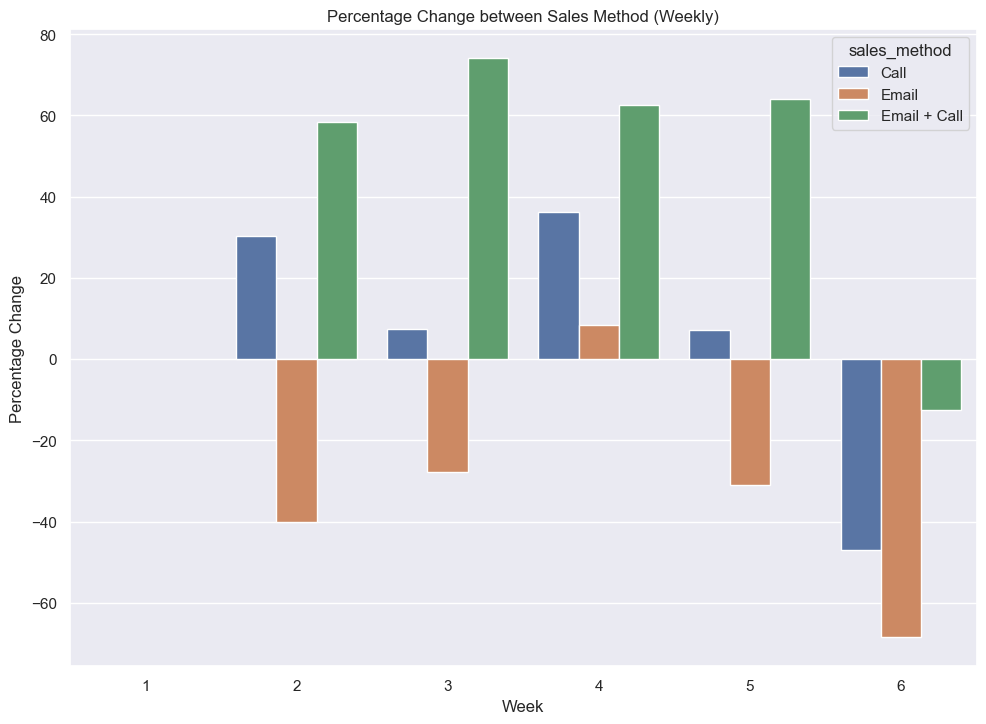

In [112]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data= rev_sum, x= 'week', y= 'percent_change', hue= 'sales_method')
plt.xlabel('Week')
plt.ylabel('Percentage Change')
plt.title('Percentage Change between Sales Method (Weekly)')

# Display the plot
plt.show()



The 'Email + Call' method consistently shows positive changes in revenue week by week until it looses its momentum in the 6th week. On the other hand, 'Call' exhibits slower overall percentage growth, and 'Email' has a declining rate of revenue after the first week.

# Final Summary and Recommendations:

To optimize revenue and sales performance, the business should consider the following actions:

1.) Focus on 'Email + Call': Given that the combined 'Email + Call' method generates the highest revenue, the       business should prioritize and enhance this sales approach to maximize its potential.

2.) Enhance 'Email' Strategy: As 'Email' sales strategy is crucial as it is currently the most frequently used method, but its growth momentum appears to be stagnant. Focusing on optimizing email campaigns, refining content, and personalization. 

3.) Monitor and Adjust: Continuously monitor revenue changes weekly and revenue sales method trends to stay responsive to market dynamics and adjust strategies as needed.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation